This is for `pointpats` package v2.4.0

In [1]:
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pointpats import distance_statistics as stats
from pointpats import PointPattern, PoissonPointProcess

In [2]:
cases = gpd.read_file("https://raw.githubusercontent.com/Ziqi-Li/GEO4162C/main/data/SnowGIS/Cholera_Deaths.shp")

pump = gpd.read_file("https://raw.githubusercontent.com/Ziqi-Li/GEO4162C/main/data/SnowGIS/Pumps.shp")

In [3]:
x = cases.geometry.x.values
y = cases.geometry.y.values

points = np.array(list(zip(x,y)))

The new interface will just take `points`.

### G function

In [4]:
g_rslt = stats.g_test(points, n_simulations=100, keep_simulations=True)

Text(0.5, 1.0, 'G Function Plot')

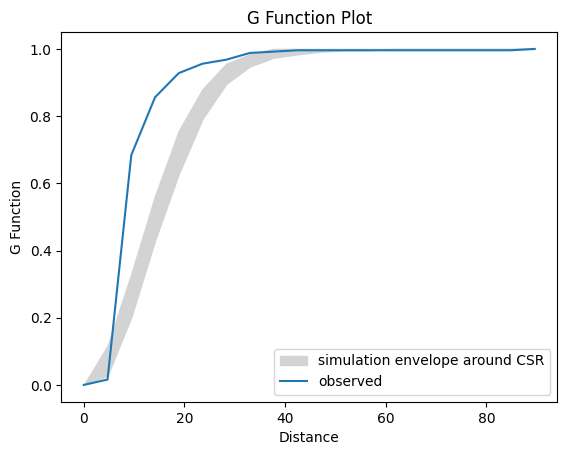

In [5]:
# grab the middle 95% of simulations using numpy:
middle_95pct = np.percentile(g_rslt.simulations, q=(2.5, 97.5), axis=0)

# use the fill_between function to color between the 2.5% and 97.5% envelope
plt.fill_between(g_rslt.support, *middle_95pct, 
                 color='lightgrey', label='simulation envelope around CSR')

# plot the line for the observed value of G(d)
plt.plot(g_rslt.support, g_rslt.statistic, label='observed')

plt.legend()
plt.xlabel('Distance')
plt.ylabel('G Function')
plt.title('G Function Plot')


Curves within the grey band are not statistically different than CSR (at 95% level).

### K function

In [6]:
k_rslt = stats.k_test(points, n_simulations=100, keep_simulations=True)

Text(0.5, 1.0, 'K Function Plot')

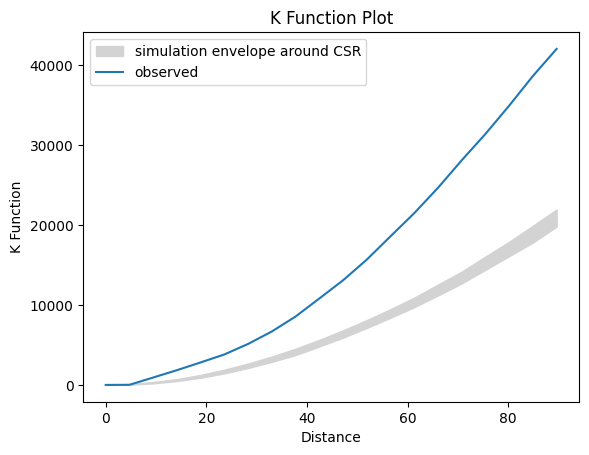

In [7]:
# grab the middle 95% of simulations using numpy:
middle_95pct = np.percentile(k_rslt.simulations, q=(2.5, 97.5), axis=0)

# use the fill_between function to color between the 2.5% and 97.5% envelope
plt.fill_between(k_rslt.support, *middle_95pct, 
                 color='lightgrey', label='simulation envelope around CSR')

# plot the line for the observed value of G(d)
plt.plot(k_rslt.support, k_rslt.statistic, label='observed')


plt.legend()
plt.xlabel('Distance')
plt.ylabel('K Function')
plt.title('K Function Plot')

### F Function

In [8]:
f_rslt = stats.f_test(points, n_simulations=100, keep_simulations=True)

Text(0.5, 1.0, 'F Function Plot')

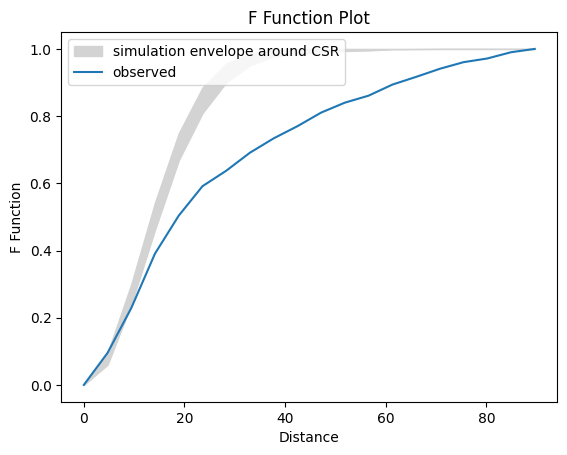

In [9]:
# grab the middle 95% of simulations using numpy:
middle_95pct = np.percentile(f_rslt.simulations, q=(2.5, 97.5), axis=0)

# use the fill_between function to color between the 2.5% and 97.5% envelope
plt.fill_between(f_rslt.support, *middle_95pct, 
                 color='lightgrey', label='simulation envelope around CSR')

# plot the line for the observed value of G(d)
plt.plot(f_rslt.support, f_rslt.statistic, label='observed')


plt.legend()
plt.xlabel('Distance')
plt.ylabel('F Function')
plt.title('F Function Plot')